# Unit 5 - Financial Planning - final


In [46]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import hvplot

In [47]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [48]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [49]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [50]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [51]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url).json()
# Fetch current ETH price
response_eth_data = requests.get(eth_url).json()



In [52]:
# Compute current value of my crpto
my_btc_value = response_btc_data['data']['1']['quotes']['USD']['price']
my_btc_value

16098.51

In [53]:
# Compute current value of my crpto
my_eth_value = response_eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value

462.57

In [54]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $16098.51
The current value of your 5.3 ETH is $462.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [55]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [66]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [57]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [58]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15944.50
The current value of your 200 AGG shares is $23731.00


### Savings Health Analysis

In [59]:
# Create savings DataFrame

crypto_value = my_btc_value + my_eth_value
stocks_value = my_agg_value + my_spy_value

portfolio = [{"crypto": crypto_value,
              "shares": stocks_value }]


# Display savings DataFrame
df_savings1 = pd.DataFrame(portfolio)
    
df_savings = df_savings1.transpose(copy=False)
df_savings.rename(columns={"0": "Amount"})
df_savings.head()                        


,0
crypto,16561.08
shares,39675.50


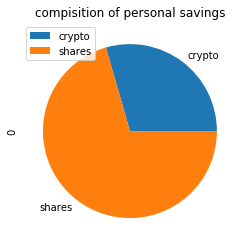

In [68]:
# Plot savings pie chart
df_savings.plot.pie(y=0, title = "compisition of personal savings")

In [67]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings[0].sum()

# Validate saving health

if total_savings > emergency_fund:
    print("yay!! you have enough money in your rainy-day fund.")
elif total_savings < emergency_fund:
    print(f"You are $ {emergency_fund - total_savings} away from reaching your goal of saving at least 3 times your monthly expenses")
else:
    print("yay! You have reached your goal of saving at least 3 times your monthly expenses")

yay!! you have enough money in your rainy-day fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [62]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-20', tz='America/New_York').isoformat()

In [63]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562  202.85   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723  203.61   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   

                                                                
                             high       low   close     volume  
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.3000  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.5600  206.97   51484043

In [64]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Print the simulation input data
MC_dist.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-20 00:00:00-04:00          NaN  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.3000  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.5600  206.97   

                                                   
                              volume daily_return  
2015-10-20 00:00:00-04:00   60081395          NaN  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602

In [65]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013459,0.995449,1.008674,1.001880,1.011602,1.002373,0.986307,1.015860,0.991684,0.999009,...,0.993427,0.989568,1.003030,1.007638,0.986944,0.994319,0.999046,0.991574,1.005865,1.000217
2,1.024390,0.988137,1.013333,0.998474,1.021094,1.017970,0.988508,1.014934,0.994489,1.013941,...,0.986284,0.995332,1.004315,1.012469,0.986509,0.994818,0.998271,0.986621,0.993321,0.998491
3,1.031144,0.977957,1.015914,0.999143,1.028477,1.033553,0.982494,1.022914,0.995371,1.018024,...,0.986328,1.009669,1.013857,1.016799,0.993073,0.987385,0.990437,0.986301,1.000745,1.006860
4,1.038120,0.980780,1.013338,1.003013,1.035527,1.036893,0.975806,1.018623,0.992720,1.019545,...,0.992976,1.017992,1.008089,1.024963,0.990253,0.987735,1.006455,0.989276,0.987443,0.999172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.849661,7.911503,2.958924,7.869382,8.170481,10.376963,3.455183,26.713273,12.998160,4.227837,...,31.641242,11.918144,7.513616,17.696151,16.725653,13.207633,3.967053,25.022008,10.058291,4.572654
7557,4.851228,7.962156,2.969992,7.941618,8.178777,10.267636,3.462067,27.403256,13.054728,4.169467,...,32.092288,11.857022,7.514203,17.903369,16.422771,13.236974,3.999540,25.103033,10.103909,4.647639
7558,4.829591,8.037437,2.959005,8.110122,8.238516,10.285773,3.475822,27.923442,13.020900,4.152824,...,31.959778,11.836958,7.481272,17.855433,16.406744,13.296018,4.042589,24.965783,10.085675,4.627325
7559,4.799399,8.043541,2.927747,8.041451,8.226692,10.221714,3.479440,27.890383,13.142495,4.149404,...,32.079207,11.536646,7.564131,17.991033,16.475918,13.238533,4.066153,24.927746,9.908200,4.663318


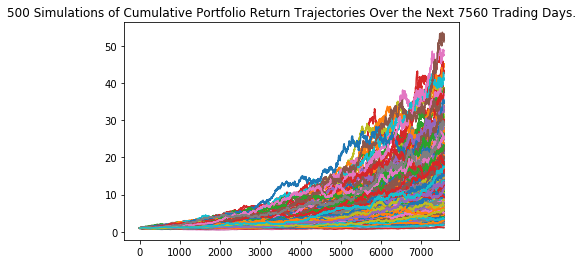

In [24]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

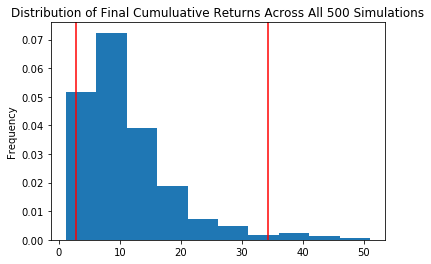

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.281280
std               7.767416
min               1.107918
25%               6.027637
50%               9.185014
75%              13.895285
max              51.091906
95% CI Lower      2.717658
95% CI Upper     34.293513
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54353.17 and $685870.26


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [28]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment_new,2)
ci_upper = round(tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81529.75 and $1028805.39


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)


# Print the simulation input data
MC_dist_2.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-20 00:00:00-04:00          NaN  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.3000  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.5600  206.97   

                                                   
                              volume daily_return  
2015-10-20 00:00:00-04:00   60081395          NaN  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005874,0.986719,1.011754,0.993033,0.995937,1.005442,0.997289,0.994069,1.012397,0.996749,...,0.997733,1.000861,1.006964,1.000870,0.981006,1.006896,1.003397,1.002592,0.998519,0.996495
2,1.002846,0.965967,1.015909,0.990492,1.004575,1.002984,0.997725,0.996003,1.014448,0.990071,...,0.999630,0.990923,1.009035,0.997591,0.991758,1.013779,1.009422,1.018862,0.996939,0.997688
3,1.001266,0.944520,1.018626,1.001190,1.009722,1.014624,0.990144,0.989809,1.009197,0.994708,...,0.990790,0.996629,1.011130,0.990435,0.997647,1.007736,1.013631,1.015556,0.981261,0.994744
4,1.002801,0.943173,1.030138,0.993644,1.020450,1.005502,0.985443,0.991226,1.007631,0.993728,...,0.999360,1.001797,1.008729,0.994765,0.993323,1.012403,1.023062,1.017497,0.993149,0.992608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.258693,1.306445,1.905377,1.033475,1.658568,2.291603,1.457358,1.432471,1.494995,1.345642,...,1.508587,1.154155,2.092733,1.603200,1.362665,1.357052,1.523028,1.625650,1.469839,1.927647
1257,1.265085,1.321599,1.899937,1.032269,1.643762,2.288894,1.456371,1.431587,1.509512,1.334526,...,1.509354,1.152752,2.096199,1.600695,1.375377,1.340491,1.505957,1.627893,1.476878,1.931320
1258,1.258358,1.325800,1.905584,1.028787,1.649322,2.285364,1.435954,1.440526,1.512969,1.328773,...,1.503990,1.155311,2.116530,1.596460,1.383665,1.339924,1.502308,1.626824,1.462112,1.939561
1259,1.257702,1.338228,1.925514,1.023359,1.668404,2.275289,1.433568,1.424143,1.524196,1.325014,...,1.525578,1.170583,2.167684,1.580880,1.385737,1.324471,1.511775,1.632314,1.454588,1.939734


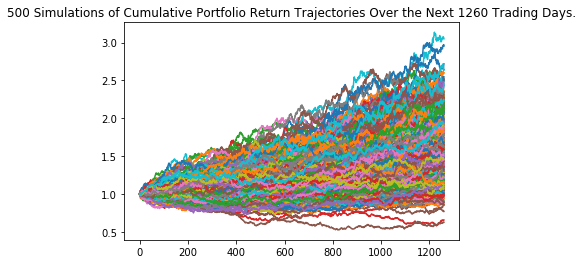

In [31]:
# Plot simulation outcomes
line_plot = MC_dist_2.plot_simulation()

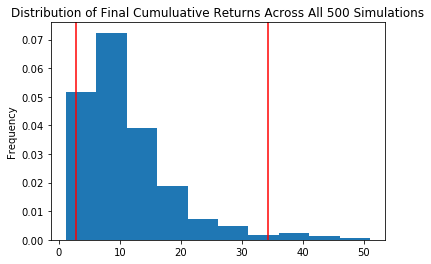

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_dist_2.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.515707
std               0.396910
min               0.627137
25%               1.224857
50%               1.453128
75%               1.731190
max               3.050140
95% CI Lower      0.940531
95% CI Upper      2.400320
Name: 1260, dtype: float64


In [34]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56431.85 and $144019.21


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)


# Print the simulation input data
MC_dist_ten.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-20 00:00:00-04:00          NaN  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.3000  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.5600  206.97   

                                                   
                              volume daily_return  
2015-10-20 00:00:00-04:00   60081395          NaN  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998692,0.996012,0.982521,1.005358,1.013635,1.001305,1.005786,1.012883,1.001533,1.014416,...,1.006009,0.993602,0.992507,1.007664,0.995968,0.990748,0.997465,0.996087,0.996274,1.009497
2,1.006261,0.991840,0.996437,0.998253,1.013078,0.998405,1.004598,1.009914,0.997934,1.008516,...,1.012067,0.987885,0.993612,1.003464,1.000064,0.993429,0.993192,1.006444,1.012290,1.012156
3,1.021763,0.992549,0.994004,1.001642,1.010871,1.004185,1.003108,1.015153,0.995943,1.006644,...,1.022639,0.991202,0.985109,1.008158,1.005323,0.978591,0.997161,1.001266,1.003480,1.019926
4,1.020850,0.983863,0.985141,1.000233,1.008721,1.008371,1.010751,0.998874,0.994752,0.993099,...,1.032031,0.978750,0.981009,1.004511,1.015069,0.984050,1.001135,0.997011,1.000529,1.021507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.671206,2.984918,1.099210,1.165289,2.267840,1.510909,2.135081,1.373966,2.328308,1.809196,...,3.126132,3.137537,1.390673,2.818098,3.607546,1.206121,2.461929,3.437699,2.204394,1.322422
2517,3.648992,3.032920,1.080638,1.156418,2.301849,1.516523,2.116447,1.358660,2.330560,1.828533,...,3.126872,3.149524,1.396896,2.817099,3.603233,1.217721,2.491112,3.443246,2.190662,1.318203
2518,3.624220,3.045157,1.073852,1.158780,2.274628,1.536566,2.137103,1.365231,2.318818,1.817538,...,3.120211,3.176010,1.402884,2.819159,3.658146,1.211466,2.486121,3.462393,2.220225,1.324454
2519,3.620752,3.070693,1.063433,1.157374,2.272733,1.529246,2.158447,1.371408,2.315483,1.804776,...,3.105148,3.189661,1.391281,2.834120,3.646343,1.191501,2.472586,3.463862,2.212856,1.321741


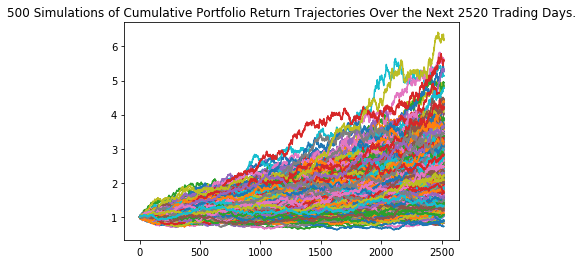

In [37]:
# Plot simulation outcomes
line_plot = MC_dist_ten.plot_simulation()

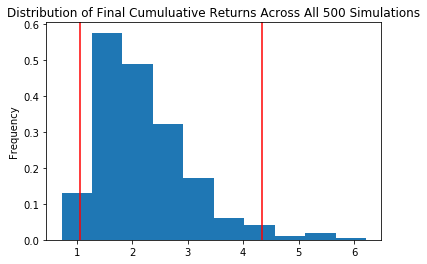

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist_ten.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.209153
std               0.839712
min               0.729810
25%               1.614236
50%               2.053207
75%               2.642055
max               6.214219
95% CI Lower      1.063556
95% CI Upper      4.340604
Name: 2520, dtype: float64


In [40]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63813.33 and $260436.24
